# Predicting heart disease using machine learning

This notebook looks into using various Python-based Machine Learning and Data Science libraries in an attempt to build an ML model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data (what data we're gonna use )
3. Evaluation (what defines success)
4. Features
5. Modeling
6. Experimentation

# 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease.


## 2. Data

The dataset used comes from the Cleveland Heart Disease dataset, made accessible via Kaggle and originally from the UCI Machine Learning Repository.The dataset includes 303 samples and 14 features:

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where we get info abt each of the features in the data.

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
  0: Upsloping: better heart rate with excercise (uncommon)
  1: Flatsloping: minimal change (typical healthy heart)
  2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Rgular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [4]:
df= pd.read_csv("/content/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis (EDA))

The goal here is to find out more about the data and become a subject matter expert on the dataset we're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data ? How do we deal with it ?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Let's find out how many of each class there are

df["target"].value_counts()

,count
target,
1,165
0,138


relatively balanced dataset!

<Axes: xlabel='target'>

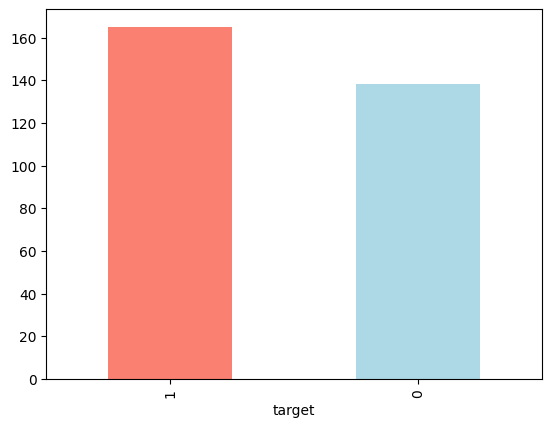

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Freaquency according to sex

In [12]:
df.sex.value_counts()

,count
sex,
1,207
0,96


There is a lot of males (1) to females (0). Datasets telted to having more males than females

In [13]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


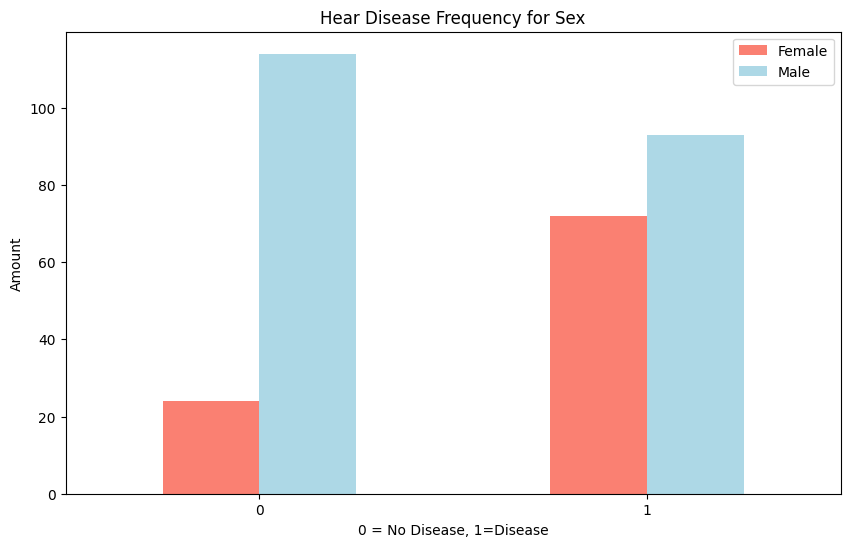

In [14]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("Hear Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [15]:
df["thalach"].value_counts()

,count
thalach,
162,11
163,9
160,9
173,8
152,8
...,...
117,1
71,1
118,1


## Age vs. Max Heart Rate for Heart Disease

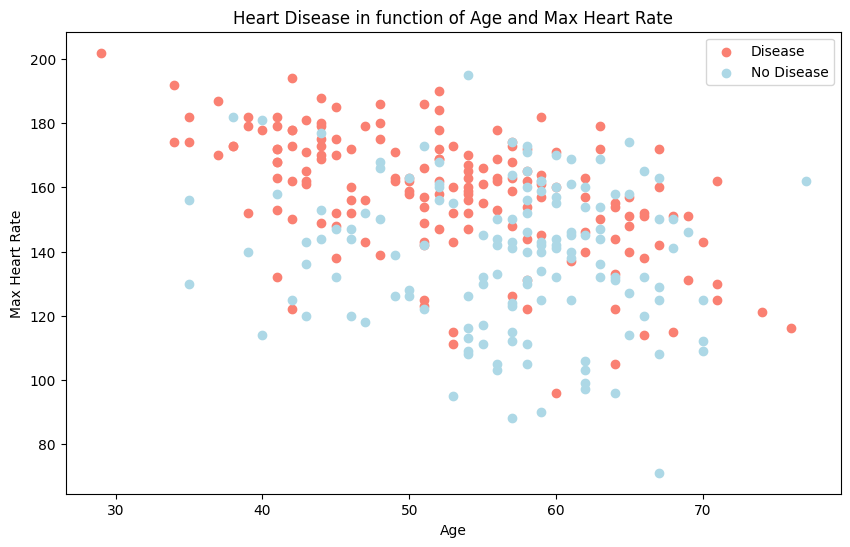

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

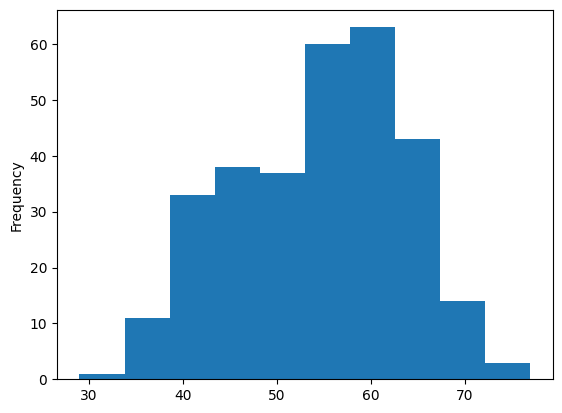

In [17]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


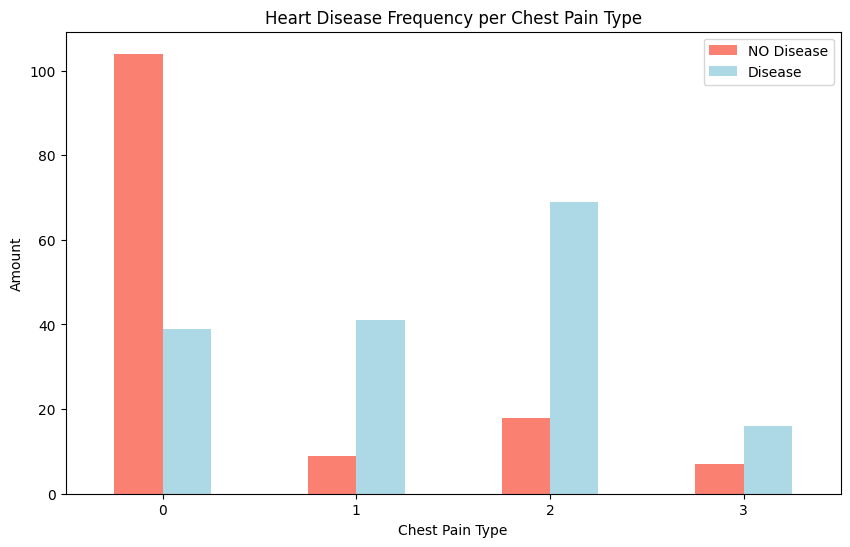

In [19]:
# make the crossstab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO Disease", "Disease"])
plt.xticks(rotation=0);

In [20]:
# Make a correaltion Matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


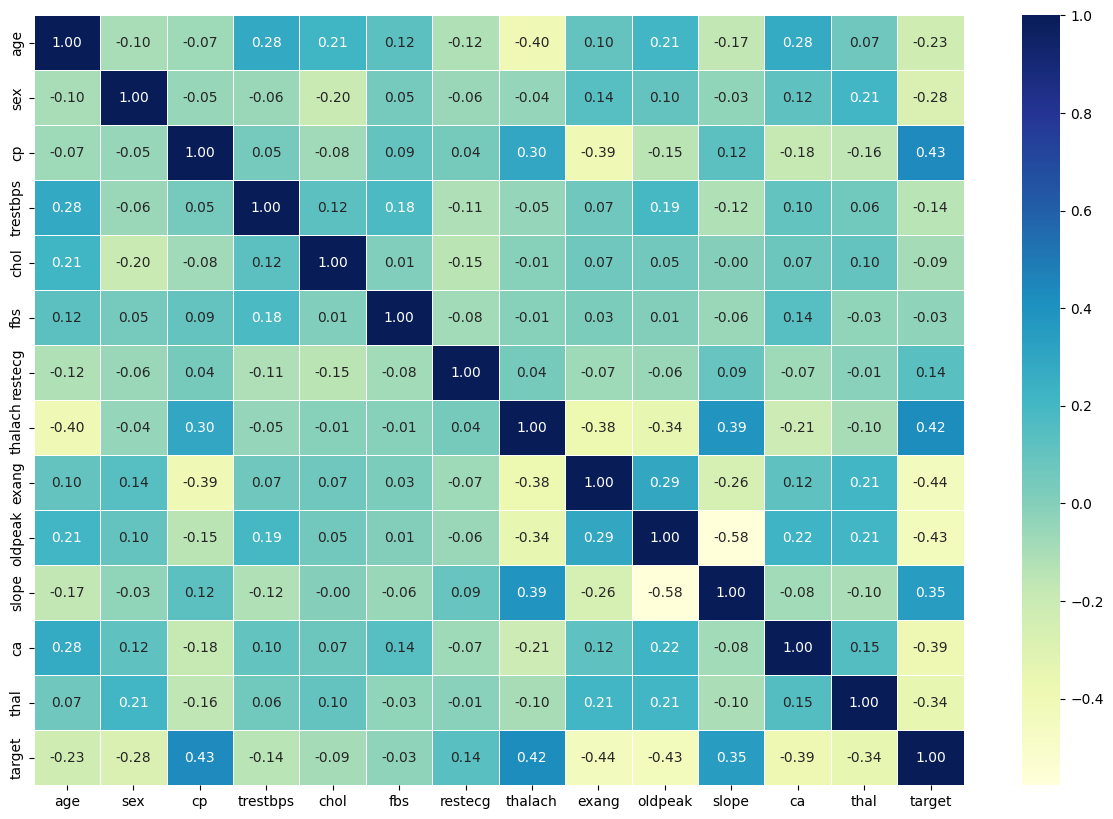

In [21]:
#Let's make our correlation matrix better
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
                annot= True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5. Modeling

In [22]:
# Split data into X and y
X= df.drop("target", axis=1)
y= df["target"]


In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [25]:
# Split the data into train and test sets
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now, we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (frind the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 differnt machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours  Classifier
3. Random Forest Classifier

In [28]:
# Put models in a dictionary

models = {"Logistic Regression":LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalutes given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data (no labels)
    X_test: Testing data (no labels)
    y_train: training labels
    y_test: test_labels
    """

    # set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores= {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)

    return model_scores


In [29]:
model_scores= fit_and_score(models=models,
                           X_train=X_train,
                           X_test= X_test,
                           y_train= y_train,
                           y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

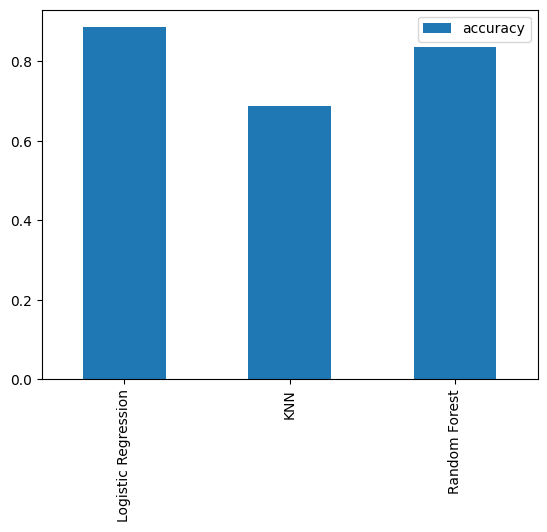

In [30]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Logistic Regression's accuracy is close to the Random Forest's accuracy but KNN model is doing poorly compared to the two other models. Let's do some hyperparameter tuning!

Now we've got a Baseline model and we know a model's first predictions aren't always what we should base our next steps off. We're gonna evaluate further by:

Let's look at the following:
* Hyperparameter tuning
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

Since we're gonna fine tune only one hyperparameter in the KNN model, we'll do it by hand this time

In [31]:
# Let's tune KNN

train_scores= []
test_scores= []

# Create a list of different values for n_neighbors
neighbors= range(1, 21) # 1 to 20 k values

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


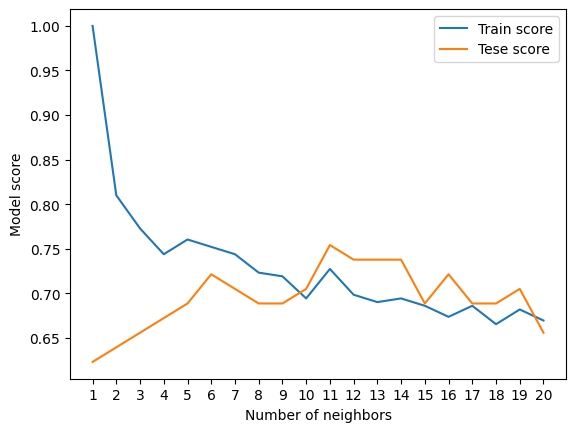

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Tese score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

We get the highest value at around 11. A K=11 yields the best score on the test dataset. 75.41 accuracy vs 68% previously. but still far below logistic regression and Random forest. So let's eliminate it for now and focus on the others:

## Hyperparameter tuning with randomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [35]:
#Create a hyperparameter grid for logistic regression
log_reg_grid= {"C": np.logspace(-4, 4, 20),
              "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid ={"n_estimators": np.arange(10, 1000, 50),
         "max_depth": [None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [36]:
# Tune Logistic Regression

np.random.seed(42)

#Setup RANDOM HYPERPARAMETER SEARCH FOR LOGISTIC REGRESSION
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Our original result didn't change! (same accuracy for Logistic regression).

Now, let's tune Random Forest Classifier

In [39]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [41]:
# Evaluate the Randomized search RandomForestClassifier model

rs_rf.score(X_test,y_test)

0.8688524590163934

We got a little bit of an improvement from 83.6% to 86.8%. The Logistic Regression model is still better!

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best score so far, we'll try and improve them again using GridSearchCV

In [42]:
np.random.seed(42)

# Different hyperparameters for our Logistic Regression model
log_reg_grid = {"C": np.logspace(-4, 4,30),
               "solver":["liblinear"]}

# setup grid hyperparameter search for Random Forest Classifier
gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose= True)

# Fit grid hyperparameters search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [44]:
# Evaluate the GridSearch Logistic Regression model

gs_log_reg.score(X_test,y_test)

0.8852459016393442

We didn't get any better, it looks like our Baseline Logistic Regression did really well! No improvement after the GridSearch. Let's dig deeper!

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

and cross-validation where possible

In [45]:
# Make predictions with tuned Model
y_preds= gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


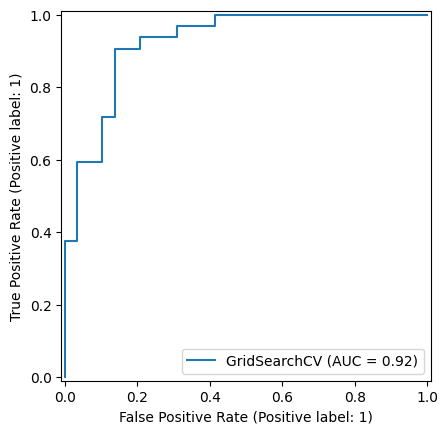

In [47]:
from sklearn.metrics import RocCurveDisplay

# Assuming you have a fitted model `gs_log_reg`
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [48]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


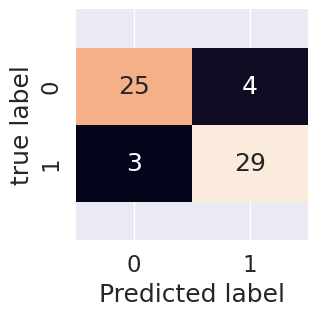

In [49]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("true label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5)

plot_conf_mat(y_test, y_preds)

Now we've got a Roc curve, an AUC metric and a confusion matrix. let's get a classification report as well as cross-validated precision, recall and F1 score.

In [50]:
# Classification report

print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross_validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score

In [51]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [52]:
# Create a new classifier with best parameters

clf= LogisticRegression(C=np.float64(0.20433597178569418),
                        solver= "liblinear")

In [53]:
# Cross_validated accuracy

np.random.seed(42)

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [54]:
cv_acc= np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [55]:
# Cross_validated precision

np.random.seed(42)

cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision= np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [56]:
# Cross_validated recall
np.random.seed(42)

cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall= np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [57]:
# Cross_validated f1-score
np.random.seed(42)

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1= np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

<Axes: title={'center': 'Cross-validated classification metrics'}>

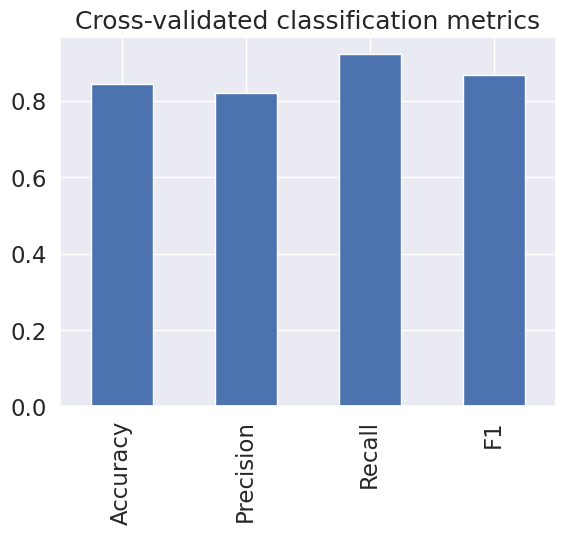

In [58]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

### Feature importance

Which features contributed most to the outcomes of the model and how did they contribute?

legt's find the feature importance for our LogisticRegression model

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf= LogisticRegression(C=0.2043359717856918,
                       solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.2043359717856918, solver='liblinear')

In [61]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044602,  0.66067063, -0.01156993, -0.00166374,
         0.04386123,  0.31275805,  0.02459361, -0.60413051, -0.56862837,
         0.4505162 , -0.63609873, -0.67663374]])

how much or in what way each of these contribute to our target variable ?

In [62]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672744585739946),
 'sex': np.float64(-0.8604460230060401),
 'cp': np.float64(0.6606706309458492),
 'trestbps': np.float64(-0.01156993155519605),
 'chol': np.float64(-0.0016637419281716496),
 'fbs': np.float64(0.04386123379001633),
 'restecg': np.float64(0.3127580529452937),
 'thalach': np.float64(0.02459360929080973),
 'exang': np.float64(-0.6041305059660959),
 'oldpeak': np.float64(-0.5686283712663797),
 'slope': np.float64(0.45051620020077937),
 'ca': np.float64(-0.636098733126454),
 'thal': np.float64(-0.6766337380278813)}

<Axes: title={'center': 'Feature Importance'}>

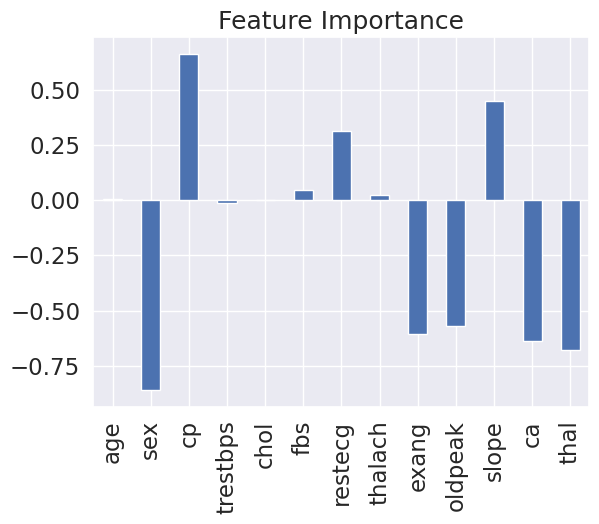

In [63]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend= False)

So how much each feature contributes to predicting the target ?

Sex is fairly negatively correlated

In [64]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [65]:
72/3


24.0

In [66]:
114/2


57.0

In [67]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When we look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can we do with this information?

This is something we might want to talk to a subject matter expert about.

They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.
9. Experimentation

We've completed all the metrics!

You should be able to put together a great report containing a confusion matrix, and a handful of cross-validated metrics such as precision, recall and F1-score and you can even include which features contribute most to the model making a decision.

Did we meet the evaluation metric? (defined in step 3)

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

In this case, we didn't.

The highest accuracy our model achieved was below 90%.

## Explanations for Non-Technical Users

To make the model more transparent and easier to understand—especially for non-technical users such as medical professionals or decision-makers—we include an explainability module based on SHAP (SHapley Additive exPlanations).


In [68]:
!pip install shap


<ipython-input-70-3396545163>:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


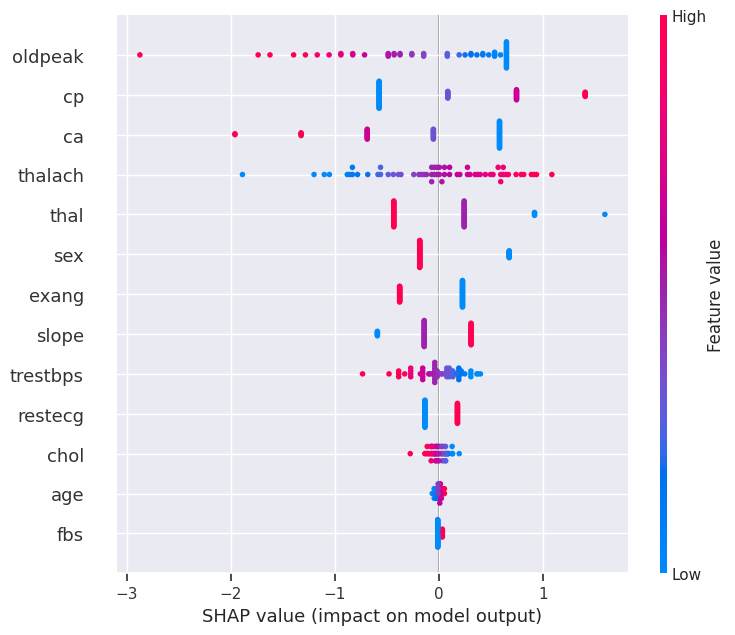

In [70]:
import shap
explainer = shap.Explainer(clf, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)



 **Interpretation of SHAP Beeswarm Plot:**

* **`oldpeak` (ST depression induced by exercise):**
  Medically, a higher `oldpeak` indicates more ST depression, which usually suggests that the heart is under stress — a sign of possible ischemia.
  However, in this model, we observe that **high `oldpeak` values (in red) tend to reduce the predicted probability of heart disease**, as they cluster on the **left** of the SHAP plot.
  On the other hand, **low `oldpeak` values (blue)** push the prediction **slightly to the right**, increasing predicted risk.

  This is counterintuitive based on clinical knowledge, and may be due to:
  - interactions with features like `slope`, `cp`, or `ca`
  - imbalance or noise in the dataset
  - lack of model capacity to capture medical interactions



* **`cp` (chest pain type):**
  The SHAP plot for `cp` shows a set of distinct vertical lines, each corresponding to a discrete chest pain category (e.g., 0 = typical angina, 3 = asymptomatic).  
  
  - The leftmost blue line at around -0.75 likely represents `cp=0` (typical angina), and interestingly, it pushes the prediction **downward** — suggesting a **lower predicted risk**, contrary to medical expectations.

  - On the other hand, higher `cp` values (e.g., `cp=2` or `cp=3`) appear as darker purple or red lines **on the right**, indicating a **higher predicted risk** in the model.

  This inversion of medical intuition suggests that the model may have learned **non-causal correlations** or that `cp` is interacting with other features in complex ways.  


* **`ca` (number of major vessels visualized via fluoroscopy):**
  This feature is among the most medically intuitive in the model.  
  In the SHAP plot, we see four distinct vertical lines, each corresponding to one of the categorical values from 0 to 3.

  - The **light blue line at SHAP ≈ +0.65** likely represents `ca = 0`, indicating **no vessels clearly visible**, which strongly **increases the predicted risk** of heart disease.
  - As we move left:
    - A light purple line at ≈ -0.1 and a dark purple line at ≈ -0.7 likely represent `ca = 1` and `ca = 2`, showing **decreasing influence** on predicted risk.
    - Finally, a red dot at ≈ -2 represents `ca = 3`, meaning **all vessels are visible**, which strongly **lowers the model’s prediction**.

  This feature shows a **clear monotonic relationship**: more visible vessels → lower risk.  
  It confirms that the model has learned a **medically consistent** pattern, which increases trust in its decisions.


 * **`thalach` (maximum heart rate achieved):**
  Surprisingly, the SHAP summary plot shows an **inversion of clinical expectations**.

  - **Low values** of `thalach` (blue points) appear mostly on the **left**, suggesting they **lower the predicted risk**, even though they are typically a sign of poor cardiovascular performance.
  - **High values** (magenta to pink points) appear **on the right**, meaning they **increase** the model's prediction of heart disease, which contradicts standard medical logic.

  This mismatch suggests that the model may be capturing **non-causal correlations**, possibly due to **confounding with age, sex, or other features**.

  It highlights the value of SHAP: while `thalach` was important, its **influence is not aligned with medical knowledge**, so care must be taken in interpreting the model's predictions in a clinical setting.


* **`thal` (thalium stress test result):**
  The model has clearly learned to interpret thalium stress test results in a clinically accurate way:

  - **High values** (`thal = 7`, reversible defect), shown in **red**, appear on the **left** (SHAP ≈ -0.45), indicating a **strong increase in predicted risk**.
  - Slightly lower values (`thal = 6`, fixed defect) have **moderate impact**, appearing near SHAP ≈ +0.3.
  - **Normal test results** (`thal = 3` or `1`), shown in **blue**, are concentrated on the **right** (e.g., SHAP ≈ +0.85 to +1.7), and are associated with **substantially lower risk**.

  This demonstrates that the model has internalized a **ranked risk logic** for this categorical variable — from high-risk reversible defects to low-risk normal values — consistent with clinical practice.

- **`sex` (1 = male, 0 = female):**
  The SHAP plot shows that **male patients (red)** tend to have **negative SHAP values**, meaning their sex reduces the model’s predicted risk of heart disease.  
  Conversely, **female patients (blue)** show **positive SHAP values**, meaning being female increases the predicted risk.

  - This is the opposite of clinical expectation and likely reflects dataset-specific patterns, or feature interactions.  
  - This finding is a red flag for potential bias and highlights the importance of explainability methods.

  * **`exang` (exercise-induced angina):**
  Patients with **exercise-induced angina (red points)** are clustered on the **left** of the SHAP axis, meaning this feature **reduces** the model's predicted risk.  
  Meanwhile, patients without angina (blue) are associated with **higher predicted risk**.

  This contradicts clinical expectations and likely reflects data imbalance or indirect interactions with features such as `thalach`, `slope`, or `oldpeak`.

* **`slope` (slope of ST segment during peak exercise):**
  Patients with **downsloping ST segments (red)** are on the **right** of the SHAP axis, meaning this condition increases the predicted risk of heart disease.  
  Patients with **upsloping segments (blue)** are on the **left**, reducing the risk.

  This is consistent with clinical interpretations: a downsloping ST segment is a strong indicator of cardiac stress.

* **`trestbps` (resting blood pressure):**
  The SHAP plot shows that **low blood pressure values (blue)** increase the model’s prediction of heart disease, while **high values (red)** lower the prediction.  
  This contradicts clinical expectations, suggesting the model may be capturing **non-causal correlations**, possibly due to interactions or data imbalance.

* **`chol` (serum cholesterol):**
  The SHAP plot shows `chol` has **minimal influence** on the model’s predictions, with most points centered around 0.  
  This reflects current clinical thinking: while high cholesterol is a risk factor, it’s often not strongly predictive when other features (e.g., `ca`, `thal`, `cp`) are present.

* **`age` (in years):**
  The SHAP plot shows a very **narrow spread** of SHAP values for `age`, indicating it has **low importance** in the model’s predictions.  
  While age is a known clinical risk factor, its predictive power here may be diminished due to stronger signals in features like `ca`, `thal`, or `oldpeak`.

* - **`fbs` (fasting blood sugar > 120 mg/dl):**
  The SHAP plot shows `fbs` has **negligible impact** on the model’s predictions, with all points centered tightly around 0.  
  This aligns with clinical understanding: while diabetes is a risk factor, a single high fasting blood sugar reading is not always a strong predictor in isolation.


## Clinical Takeaways

### What the model gets right:
- Correctly identifies **low number of visible vessels (`ca`)** as a strong risk factor
- Treats **abnormal `thal` stress results** (e.g., reversible defect) as increasing risk
- Understands the impact of **ST slope** and **chest pain type** in risk prediction

### Where the model may be wrong or biased:
- Predicts **higher `thalach` (heart rate)** increases risk, which contradicts clinical expectations
- Thinks that **typical angina (`cp=0`) reduces risk**, which is medically questionable
- Assigns **higher risk to females**, which may reflect dataset bias

### Trustworthiness in clinical practice:
- While some features align with medical logic, others don’t
- Predictions should not be trusted blindly in real-world diagnosis
- **Explainability tools like SHAP are essential** for sanity-checking model behavior



# Waterfall Plot for a Single Prediction:

In [75]:
# Getting the model's predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability of class = 1 (heart disease)
y_probs

array([0.13274735, 0.75591511, 0.81452423, 0.05469225, 0.88453362,
       0.87070289, 0.6051218 , 0.00435981, 0.01376378, 0.5613848 ,
       0.71720793, 0.1190414 , 0.88730101, 0.06005038, 0.96750058,
       0.93181127, 0.96404699, 0.09452757, 0.01769764, 0.02646361,
       0.7154315 , 0.02727603, 0.14274669, 0.71660796, 0.88198278,
       0.69480583, 0.84234245, 0.69335565, 0.0183094 , 0.87782367,
       0.07150764, 0.06684154, 0.01510285, 0.14314485, 0.60229472,
       0.12640328, 0.6633502 , 0.85079092, 0.81898325, 0.84121547,
       0.54515844, 0.7925083 , 0.77817598, 0.70538841, 0.83243213,
       0.02113003, 0.73216369, 0.93234387, 0.10276672, 0.06440754,
       0.13470664, 0.03554562, 0.80441972, 0.95312794, 0.31714652,
       0.00309601, 0.08734725, 0.93823575, 0.02813798, 0.01309874,
       0.06291748])

In [76]:
# Most confident prediction FOR disease (high probability)
high_risk_index = y_probs.argmax()

# Most confident prediction AGAINST disease (low probability)
low_risk_index = y_probs.argmin()


In [79]:
print(f"Highest predicted risk (class 1): {y_probs[high_risk_index]:.3f}")
print(f"Lowest predicted risk (class 1): {y_probs[low_risk_index]:.3f}")


Highest predicted risk (class 1): 0.968
Lowest predicted risk (class 1): 0.003


To explain why the model predicted someone is sick:

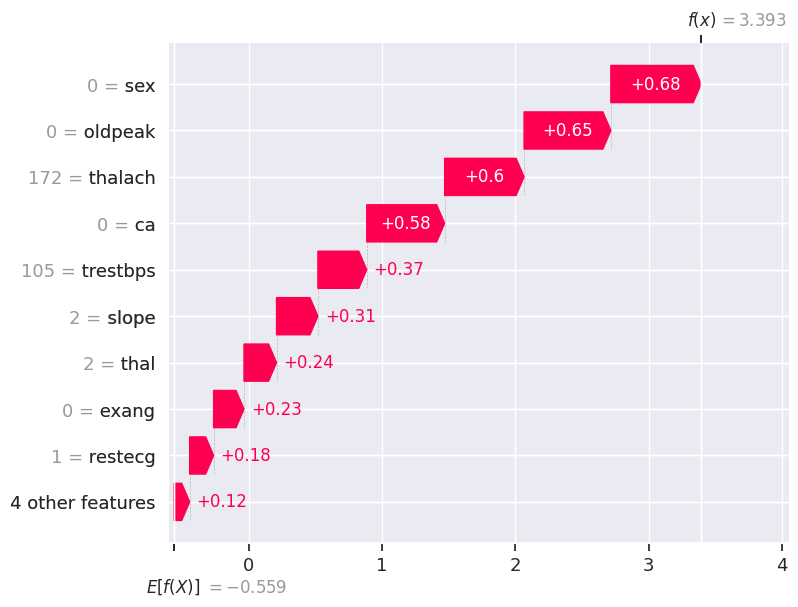

In [80]:
# High-risk prediction explanation
shap.plots.waterfall(shap_values[high_risk_index])

### SHAP Waterfall Plot — High-Risk Patient Analysis

This SHAP waterfall plot explains **why the model predicted a high probability of heart disease** for this individual patient.

- The model's baseline prediction (mean output across the population) starts at **-0.559**
- The final prediction is **+3.393**, a strong indication of disease (almost certain in a sigmoid scale)

#### Key features driving the risk up:
- `sex = 0` (female): surprisingly **increases the predicted risk** significantly (+0.68)
- `oldpeak = 0`: **low ST depression** still contributed strongly (+0.65) — this contradicts clinical expectation
- `thalach = 172`: **very high max heart rate**, yet it also increased risk (+0.60), which is **counterintuitive**
- `ca = 0`: **no vessels visualized**, a medically consistent sign of poor perfusion (+0.58)
- `trestbps = 105`: surprisingly seen as risky, even though it's within normal range (+0.37)

#### Clinical Insight:
Some features like `ca = 0` and `slope = 2` make sense medically.

However, the model also treats **very high heart rate (`thalach = 172`)** and **low ST depression (`oldpeak = 0`)** as risky.  
While extremely high heart rates may occasionally indicate stress or arrhythmia, in this context (`thalach` being maximum heart rate achieved during stress testing), such a value is typically seen as **healthy**.  
This suggests the model may be misinterpreting the clinical context, or reflecting correlations in the data that are not causally meaningful.



To explain why the model predicted someone is healthy:

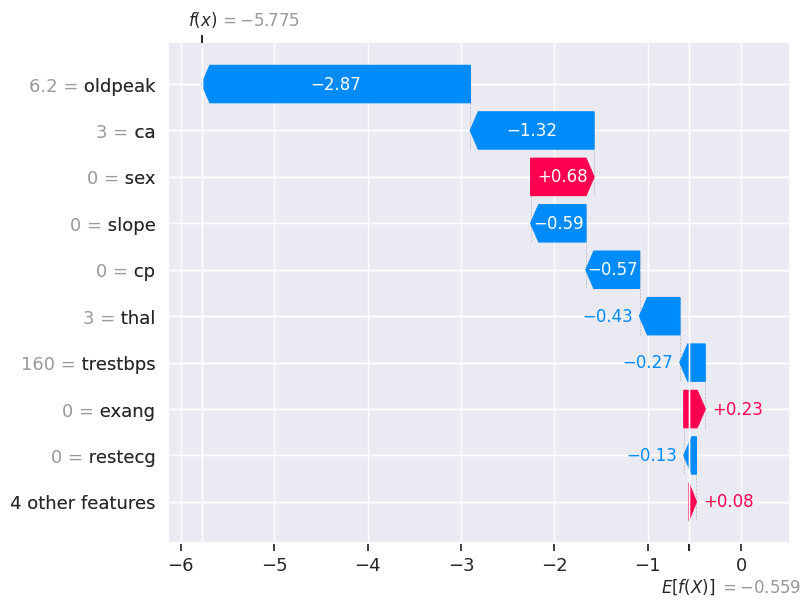

In [81]:
# low-risk prediction explanation
shap.plots.waterfall(shap_values[low_risk_index])


### SHAP Waterfall Plot — Low-Risk Patient Analysis

This SHAP waterfall plot explains **why the model predicted a very low probability of heart disease** for this individual.

- The baseline model prediction is **E[f(x)] = -0.559** (average log-odds across the training population)
- The final prediction is **f(x) = -5.775**, which corresponds to an **extremely low probability** of disease (almost 0)

#### Key features that **reduced the predicted risk**:
- `oldpeak = 6.2`: unusually high ST depression, typically a **high-risk marker**, but here the model sees it as strongly protective (**-2.87**) — likely incorrect
- `ca = 3`: all major vessels visible on angiography → a clear sign of **healthy blood flow** (**-1.32**)
- `slope = 0` and `cp = 0`: upsloping ST and typical angina, both considered low-risk here
- `thal = 3`: normal stress test → lowers risk (**-0.43**)
- `trestbps = 160`: even though this is high, its contribution is **still negative** here

#### Features pushing slightly toward higher risk:
- `sex = 0` (female): again increases predicted risk (+0.68)
- `exang = 0` (no angina) and `restecg = 0` (normal ECG): very small positive contributions

#### Clinical Insight:
While many risk-reducing features make clinical sense (e.g., `ca = 3`, `thal = 3`), the model treats **extremely high ST depression (`oldpeak = 6.2`)** as protective — which **contradicts cardiology guidelines**.  
This suggests potential confusion or mislabeling in the training data.



## Comparing High-Risk vs Low-Risk Predictions

|                           | 🔴 High-Risk Patient                         | 🔵 Low-Risk Patient                          |
|---------------------------|---------------------------------------------|---------------------------------------------|
| **Model Output (log-odds)** | +3.393 → Very high probability             | -5.775 → Extremely low probability          |
| **True Prediction Class** | Likely 1 (has disease)                      | Likely 0 (no disease)                       |
| **Top Risk-Increasing Features** | - `sex = 0` (female) +0.68  <br> - `oldpeak = 0` +0.65  <br> - `thalach = 172` +0.60 | - `sex = 0` +0.68 <br> - `exang = 0` +0.23 |
| **Top Risk-Reducing Features** | - None (all features increased risk)    | - `oldpeak = 6.2` –2.87 <br> - `ca = 3` –1.32 <br> - `thal = 3` –0.43 |
| **Interesting Findings**  | Model interprets **high heart rate** and **female sex** as risky <br> Even **low ST depression** increases risk | Model treats **extremely high ST depression** (`oldpeak = 6.2`) as protective (contradicts clinical logic) |
| **Clinical Insight**      | Some features like `ca = 0` are valid indicators, but others raise red flags | Low-risk prediction generally makes sense, but misinterpretation of `oldpeak` is concerning |

> This contrast demonstrates how explainability reveals both the strengths and flaws of the model’s reasoning. Even when performance metrics are high, inspecting individual predictions is crucial!


## Final Reflections on SHAP Explainability

Using SHAP to interpret my heart disease prediction model provided several key insights:

### What SHAP Helped Me Understand:
- It revealed **which features mattered most** in the model's decisions — such as `ca`, `thal`, `oldpeak`, and `cp`.
- It allowed me to **check if the model's logic matched clinical knowledge**, and spot when it didn’t.
- It enabled **individual-level explanations** using waterfall plots, which made the model’s predictions transparent and interpretable.

### Key Observations:
- The model correctly identified some medically relevant risk factors like:
  - `ca = 0` (no visible vessels) → high risk
  - `thal = 7` (reversible defect) → high risk
  - `slope = 2` (downsloping ST segment) → high risk

- However, SHAP also exposed some **counterintuitive patterns**, such as:
  - Treating **high heart rate (`thalach`)** and **low ST depression (`oldpeak`)** as risky
  - Assigning higher risk to **female patients**, contrary to epidemiological data
  - Interpreting **extremely high `oldpeak`** as protective in low-risk cases

### What This Taught Me:
- **Explainability tools like SHAP are essential** when applying machine learning to clinical data.
- A model can score well on metrics, but still learn **non-causal or biased correlations**.
- Without explainability, we risk deploying black-box systems that make unsafe or unfair predictions.

> In healthcare and other high-stakes domains, interpretability is not optional — it's a responsibility.